<a href="https://colab.research.google.com/github/A01793509/Equipo38/blob/main/SVM_Equipo38.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Profr. Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

*   Alberto Jose Garcia Porras (A01793509)
*   Carlos Julio León Caicedo (A01793947)
*   Luis Fernando Ríos Piedra (A00453954)
*   Marco Antonio Vázquez Morales (A01793704)

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
#***** Ejercicio 1 *********
import pandas as pd
from sklearn.model_selection import train_test_split

#***** Ejercicio 2 *********
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#***** Ejercicio 3 *********
from sklearn.dummy import DummyClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

#***** Ejercicio 4 *********
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#***** Ejercicio 5 *********
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

#***** Ejercicio 6 *********
from sklearn.model_selection import learning_curve

#***** Ejercicio 7 *********
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#***** Ejercicio 8 *********
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)

#***** Ejercicio 9 *********
from sklearn.metrics._plot.roc_curve import RocCurveDisplay

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.

In [ ]:
#Lectura del archivo desde la fuente UCI original
nombre_columnas=["A1","A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat'
df = pd.read_csv(path, sep=' ', names=nombre_columnas)

df.index.name = None

df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
X=df.drop('A15',axis=1)
Y=df['A15']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.85, random_state=0)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 242 to 684
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      586 non-null    int64  
 1   A2      586 non-null    float64
 2   A3      586 non-null    float64
 3   A4      586 non-null    int64  
 4   A5      586 non-null    int64  
 5   A6      586 non-null    int64  
 6   A7      586 non-null    float64
 7   A8      586 non-null    int64  
 8   A9      586 non-null    int64  
 9   A10     586 non-null    int64  
 10  A11     586 non-null    int64  
 11  A12     586 non-null    int64  
 12  A13     586 non-null    int64  
 13  A14     586 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 68.7 KB


El conjunto de datos tiene 6 variables numericas y 7 categóricas. De las cuales usamaos de la X1 hasta X14 para particionar el conjunto de datos en 15% para conjunto de prueba y el 85% para entrenamiento y validación. 

#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas.
Utiliza un Pipeline para evitar el filtrado de información.

In [ ]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XNumericas=["A2", "A3", "A7", "A10", "A13", "A14"]

Xtrain[XNumericas].describe()

,A2,A3,A7,A10,A13,A14
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,31.672031,4.780213,2.329480,2.448805,181.156997,984.906143
std,11.871198,5.009088,3.484635,5.029310,175.276941,5358.882002
min,13.750000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.000000,70.750000,1.000000
50%,28.710000,2.812500,1.000000,0.000000,157.000000,5.000000
75%,38.250000,7.500000,2.947500,3.000000,266.000000,351.750000
max,80.250000,28.000000,28.500000,67.000000,2000.000000,100001.000000


Determinamos que sí es necesario escalar los atributos numéricos dada la diferencia en el máximo de A13 y A14 comparándola con el resto de columnas. Aplicaremos MinMaxScaler().

In [ ]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XCategoricas=["A1","A4", "A5", "A6", "A8", "A9","A11", "A12"]

Xtrain[XCategoricas].describe()

,A1,A4,A5,A6,A8,A9,A11,A12
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000
mean,0.682594,1.767918,7.257679,4.609215,0.537543,0.426621,0.462457,1.924915
std,0.465865,0.430537,3.696635,1.955711,0.499015,0.495009,0.499015,0.300132
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,2.000000,8.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,2.000000,9.750000,5.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,14.000000,9.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
#Validamos los rangos minimo y máximo de los atributos numéricos
XBinarias = ["A15"]

Ytrain.describe()

count    586.000000
mean       0.445392
std        0.497434
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A15, dtype: float64

In [ ]:
#**********************************************************************************************************************************************************************
#Creamos los pipelines para la imputación, la transformación (escalar) de las variables numéricas y para la transformación One-hot de las variables
#categóricas y binarias:
#**********************************************************************************************************************************************************************
#Creamos el pipeline para las numéricas con la imputación utilizando la media y el minmax para escalar los datos numéricos a un rango equiparable
pipeline_numericas = Pipeline(steps = [('impMedia', SimpleImputer(strategy='mean')), ('scalar', MinMaxScaler(feature_range=(1,2)))])

#Creamos el pipeline para las categóricas con la imputación utilizando la moda y aplicando la transformación One-Hot
pipeline_categoricas = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])

Columnas_Transformar = ColumnTransformer(transformers=[('numericas', pipeline_numericas,XNumericas), ('categoricas', pipeline_categoricas, XCategoricas)], 
                                                     remainder='passthrough')

#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las
siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar
la estrategia “stratified” en este caso?

In [ ]:
modeloDummy = DummyClassifier(strategy="stratified")

XtrainFit_d = Columnas_Transformar.fit(Xtrain)   
XtrainTransf_d = XtrainFit_d.transform(Xtrain) 

modeloDummy=modeloDummy.fit(XtrainTransf_d, Ytrain)

XvalTransf_d = XtrainFit_d.transform(Xtest)
yhat = modeloDummy.predict(XvalTransf_d)

print('Valor de ACCURACY a superar: %.4f' % np.mean(accuracy_score(Ytest,yhat)))
print("Valor del F1-SCORE a superar: %.4f" % np.mean(f1_score(Ytest,yhat)))
print("Valor del PRECISION a superar: %.4f" % np.mean(precision_score(Ytest,yhat)))
print("Valor del RECALL a superar: %.4f" % np.mean(recall_score(Ytest,yhat)))

Valor de ACCURACY a superar: 0.5192
Valor del F1-SCORE a superar: 0.5000
Valor del PRECISION a superar: 0.4630
Valor del RECALL a superar: 0.5435


La utilización de stratified es útil porque nos ayuda a balancear los datos, respetando la distribución de las clases en el conjunto de entrenamiento. Con el uso de stratified se logran predicciones en el modelo para la autorización de una tarjeta de crédito evitando un sesgo hacia una de las clases. Algunas de las ventajas de esta estrategia respecto de **Most frequent, Unique y Constant**:

*   Asocia probabilidad por cada dato
*   Balacea los datos para las dos clases
*   Disminuye el sesgo hacia una de las clases

#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio
anterior.

In [ ]:
#Máquina de vector soporte (SVM) - mejores hiperparámetros con una búsqueda de malla y validación cruzada y los scores del ejercicio 3”
XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)

Mod_SVM=svm.SVC()

Mod_SVM.fit(XtrainFTf,Ytrain)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 10, 100, 1000]
degree=[2, 3, 5]
gamma= ['scale', 'auto']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_model_SVM = GridSearchCV(Mod_SVM,param_grid={'C':C,'kernel':kernel,'degree':degree, 'gamma':gamma},cv=cv,scoring='accuracy')

grid_model_SVM.fit(XtrainFTf,Ytrain)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000], 'degree': [2, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print("Los mejores hiperparámetros del modelo SVM son:", grid_model_SVM.best_params_)
print("Modelo SVM después de ajustes:", grid_model_SVM.best_estimator_)

Los mejores hiperparámetros del modelo SVM son: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Modelo SVM después de ajustes: SVC(C=10, degree=2, kernel='poly')


In [ ]:
grid_predicciones = grid_model_SVM.predict(XtestFTf)

print("Métricas Máquina de Vector Soporte (SVM):")
print('Valor de ACCURACY a superar: %.4f' % np.mean(accuracy_score(Ytest,grid_predicciones)))
print("Valor del F1-SCORE a superar: %.4f" % np.mean(f1_score(Ytest,grid_predicciones)))
print("Valor del PRECISION a superar: %.4f" % np.mean(precision_score(Ytest,grid_predicciones)))
print("Valor del RECALL a superar: %.4f" % np.mean(recall_score(Ytest,grid_predicciones)))

Métricas Maquina de Vector Soporte (SVM):
Valor de ACCURACY a superar: 0.8558
Valor del F1-SCORE a superar: 0.8276
Valor del PRECISION a superar: 0.8780
Valor del RECALL a superar: 0.7826


#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas.
Incluye tus conclusiones.

In [ ]:
#Definimos los K pliegues que utilizaremos en nuestra validación cruzada, en este caso, 5 divisiones y 3 repeticiones
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=45)
#Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
Mod_SVM_Best=svm.SVC(C=10, degree = 2, gamma ='scale', kernel= 'poly', probability=True)
# 'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'
pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", Mod_SVM_Best)])

#Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
mismetricas = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1score": make_scorer(f1_score)
}

#Ejecutamos la validación cruzada y almacenamos el resultado en la variable 'resultadosOU'
resultadosOU = cross_validate(pipeline, Xtrain, Ytrain, scoring=mismetricas, cv=kfold,  
                                return_train_score=True
                                )

#print("Métricas de %s para los datos de entrenamiento:" %nombres[i])
print("\nmean Accuracy: %.3f \nmean Precision: %.3f \nmean Recall: %.3f \nmean f1score: %.3f \n" % (
                                               np.mean(resultadosOU["train_accuracy"]),
                                               np.mean(resultadosOU["train_precision"]),
                                               np.mean(resultadosOU["train_recall"]),
                                              np.mean(resultadosOU["train_f1score"])
  ))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,



mean Accuracy: 0.914 
mean Precision: 0.890 
mean Recall: 0.922 
mean f1score: 0.905 



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [ ]:
Resultados_BOXPLOT=pd.DataFrame(resultadosOU)
Resultados_BOXPLOT.drop(columns=["fit_time","score_time", "train_accuracy", "train_precision", "train_recall", "train_f1score"], inplace=True)

Resultados_BOXPLOT.shape
Resultados_Array=Resultados_BOXPLOT
Resultados_Array

,test_accuracy,test_precision,test_recall,test_f1score
0,0.822034,0.833333,0.754717,0.792079
1,0.863248,0.846154,0.846154,0.846154
2,0.820513,0.771930,0.846154,0.807339
3,0.880342,0.839286,0.903846,0.870370
4,0.897436,0.884615,0.884615,0.884615
5,0.830508,0.746269,0.943396,0.833333
6,0.888889,0.914894,0.826923,0.868687
7,0.871795,0.849057,0.865385,0.857143
8,0.837607,0.811321,0.826923,0.819048
9,0.863248,0.821429,0.884615,0.851852


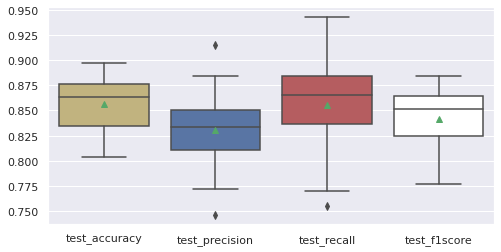

In [ ]:
#Se generan los boxplots de las métricas calculadas
Colores_BP = {"test_accuracy": "y", "test_precision": "b", "test_recall":"r", "test_f1score": "w"}
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(data=Resultados_BOXPLOT, showmeans=True, palette=Colores_BP)
plt.show()

Observamos que todas las métricas con los mejores hiperparametros presentan un  desempeño por encima del 80%, sin embargo la métrica que mejor resultado presenta es la accuracy.

Dado que el conjunto de datos tiene una **clase balanceada**, se recomienda utilizar accuracy en el modelo. Si la **clases no estan balanceadas** se recomienda utilizar las métricas de precision o recall.

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento,
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno
de estos problemas.

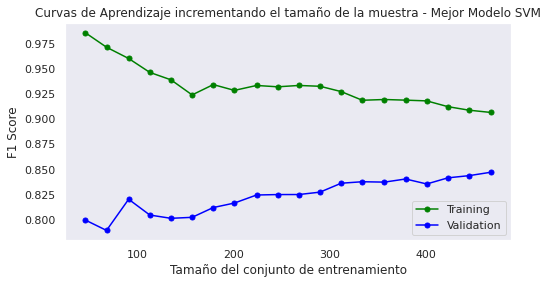

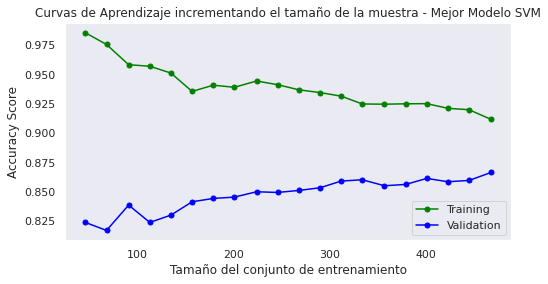

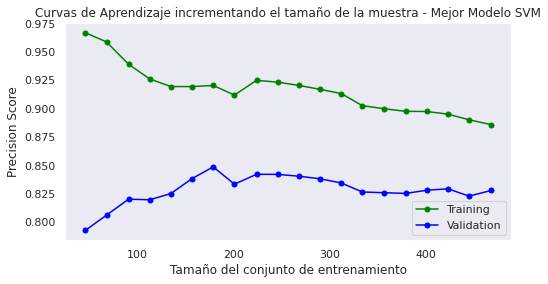

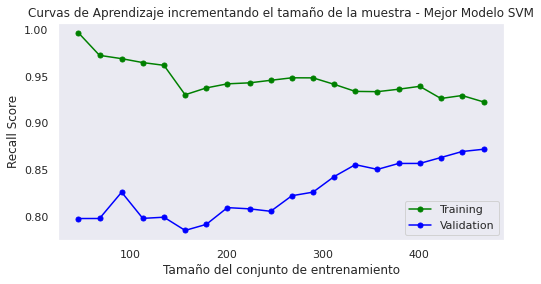

In [ ]:
#Generamos las curvas de aprendizaje para el mejor modelo SVM para cada una de las métricas evaluadas anteriormente
delta_train_sz = np.linspace(.1, 1.0, 20)

for i in range(0,4):
  if i==1:
    score_iteracion=make_scorer(accuracy_score)
    score_nombre="Accuracy Score"
  elif i==2:
    score_iteracion=make_scorer(precision_score)
    score_nombre="Precision Score"
  elif i==3:
    score_iteracion=make_scorer(recall_score)
    score_nombre="Recall Score"
  else:
    score_iteracion=make_scorer(f1_score)
    score_nombre="F1 Score"

  tr_sizes,tr_scores, val_scores = learning_curve(Mod_SVM_Best,    
                                                X = XtrainFTf,
                                                y = Ytrain,
                                                cv = cv ,
                                                train_sizes = delta_train_sz ,
                                                scoring=score_iteracion
                                                )

  train_mean = np.mean(tr_scores, axis=1)
  train_std = np.std(tr_scores, axis=1)
  valid_mean = np.mean(val_scores, axis=1)
  valid_std = np.std(val_scores, axis=1)


  # Curva de entrenamiento con la métrica de exactitud (F1-Score):
  plt.plot(tr_sizes, train_mean, color='green', marker='o', markersize=5, label='Training')

  # Curva de validación:
  plt.plot(tr_sizes, valid_mean, color='blue', marker='o', markersize=5, label='Validation')

  plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - Mejor Modelo SVM')
  plt.xlabel('Tamaño del conjunto de entrenamiento')
  plt.ylabel(score_nombre)
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

---
Los mejores hiperparámetros obtenidos fueron: # 'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly', según el análisis de las curvas de aprendizaje se **obtuvieron modelos sobreentrenados**, dado que los datos de entrenamiento presentan un sesgo bajo y una varianza alta entre las curvas de entrenamiento y validación.

Teniendo en cuenta lo anterior se realizarón ajustes en dos direcciones:

* Aumentar el conjunto de entrenamiento, para lo cual no presento ninguna mejora en los resultados ni el desempeño de las curvas.
* Se modificó el hiperparametro "C" - **parámetro de regularización**, cambiando el valor de 10 a 0,1, entendiendo que la regularización es un proceso que evita el crecimiento desmedido de los pesos del modelo, evitando la memorización de los datos y a menudo se utiliza para obtener resultados en problemas mal planteados o para evitar el sobreentrenamiento. 

A continuación se presentan las curvas de aprendizaje optimizadas con el hiperparámetro C ajustado.

---

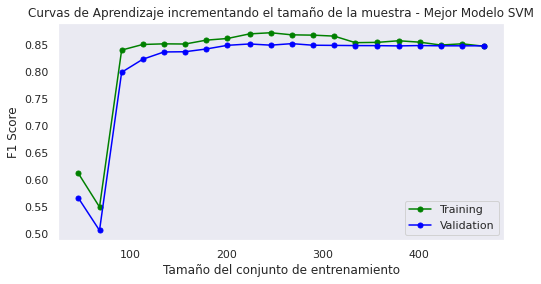

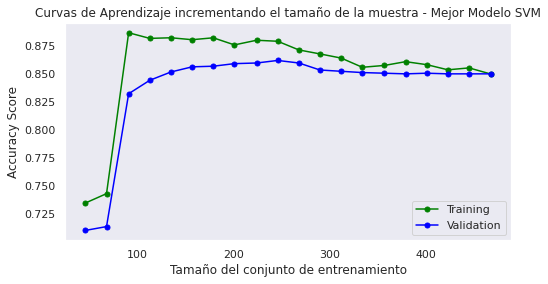

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

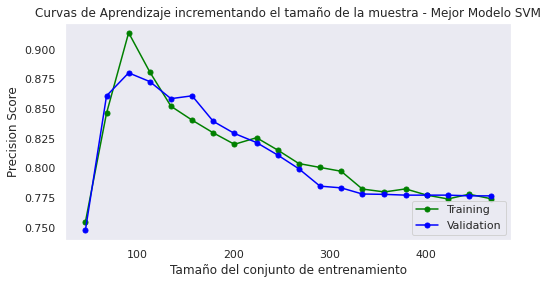

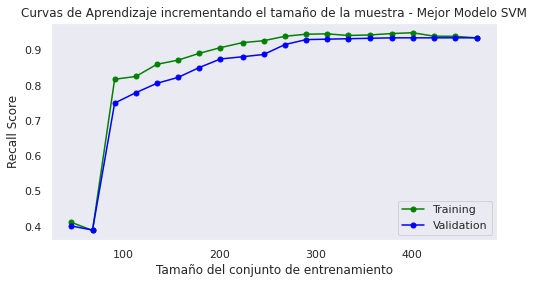

In [ ]:
#Generamos las curvas de aprendizaje para el mejor modelo SVM para cada una de las métricas evaluadas anteriormente
delta_train_sz = np.linspace(.1, 1.0, 20)

Mod_SVM_Final=svm.SVC(C=0.1, degree = 2, gamma ='scale', kernel= 'poly', probability=True)

for i in range(0,4):
  if i==1:
    score_iteracion=make_scorer(accuracy_score)
    score_nombre="Accuracy Score"
  elif i==2:
    score_iteracion=make_scorer(precision_score)
    score_nombre="Precision Score"
  elif i==3:
    score_iteracion=make_scorer(recall_score)
    score_nombre="Recall Score"
  else:
    score_iteracion=make_scorer(f1_score)
    score_nombre="F1 Score"

  tr_sizes,tr_scores, val_scores = learning_curve(Mod_SVM_Final,    
                                                X = XtrainFTf,
                                                y = Ytrain,
                                                cv = cv ,
                                                train_sizes = delta_train_sz ,
                                                scoring=score_iteracion
                                                )

  train_mean = np.mean(tr_scores, axis=1)
  train_std = np.std(tr_scores, axis=1)
  valid_mean = np.mean(val_scores, axis=1)
  valid_std = np.std(val_scores, axis=1)


  # Curva de entrenamiento con la métrica de exactitud (F1-Score):
  plt.plot(tr_sizes, train_mean, color='green', marker='o', markersize=5, label='Training')

  # Curva de validación:
  plt.plot(tr_sizes, valid_mean, color='blue', marker='o', markersize=5, label='Validation')

  plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra - Mejor Modelo SVM')
  plt.xlabel('Tamaño del conjunto de entrenamiento')
  plt.ylabel(score_nombre)
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

#**Ejercicio-7.**

Con los mejores hiperparámetros obtenidos, encontrar la gráfica de la curva ROC y su área bajo la curva.

In [ ]:
#Entrenamos el mejor modelo SVM encontrado
Mod_SVM_Final.fit(XtrainFTf, Ytrain)
#Generamos clasificador sin entrenar
ns_probs = [0 for _ in range(len(Ytest))]
# Obtenemos la predicción de las probabilidades
lr_probs = Mod_SVM_Final.predict_proba(XtestFTf)
#Mantenemos solo las probabilidades de la clase positiva (1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC (resumen del rendimiento del modelo)
ns_auc = roc_auc_score(Ytest, ns_probs)
lr_auc = roc_auc_score(Ytest, lr_probs)
# Imprimimos los resultados
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Máquina de Vector Soporte (SVM): ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Máquina de Vector Soporte (SVM): ROC AUC=0.901


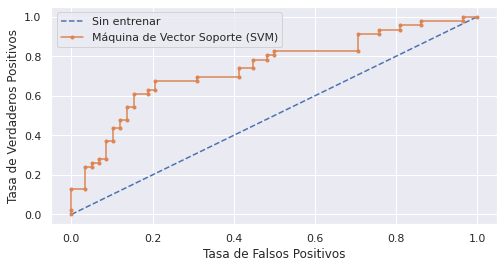

In [ ]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Ytest, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Máquina de Vector Soporte (SVM)')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

Como podemos observar nuestra curva ROC tiene una forma que nos permite asumir que nuestro modelo clasifica de manera correcta, adicionalmente el valor de AUC es de 0.901, lo que confirma que el modelo estra clasificando de manera correcta. 

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica
f1-score.

In [ ]:
XtrainTf = Columnas_Transformar.fit(Xtrain)
XtrainFTf = XtrainTf.transform(Xtrain)   
XtestFTf = XtrainTf.transform(Xtest)
 
Mod_SVM_Final.fit(XtrainFTf,Ytrain)

SVC(C=0.1, degree=2, kernel='poly', probability=True)

In [ ]:
y_pred=Mod_SVM_Final.predict(XtestFTf)
precision,recall,thresholds=precision_recall_curve(Ytest,y_pred)
 
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                     'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision

,Precision,Recall,Threshold
0,0.442308,1.000000,0
1,0.869565,0.869565,1


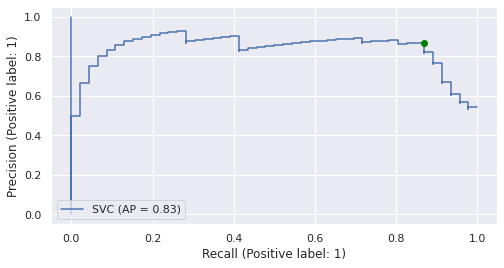

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)
index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)


PrecisionRecallDisplay.from_estimator(Mod_SVM_Final,XtestFTf,Ytest)
plt.plot(recallOpt,precisionOpt,color='green', marker='o')

In [ ]:
print('Mejor Umbral: {} con F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Mejor Umbral: 1 con F-Score: 0.8696
Recall: 0.8696, Precision: 0.8696


#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.

In [ ]:
fpr, tpr, thresholds = roc_curve(Ytest,grid_predicciones)

df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

,FPR,TPR,Threshold
0,0.000000,0.000000,2
1,0.086207,0.782609,1
2,1.000000,1.000000,0


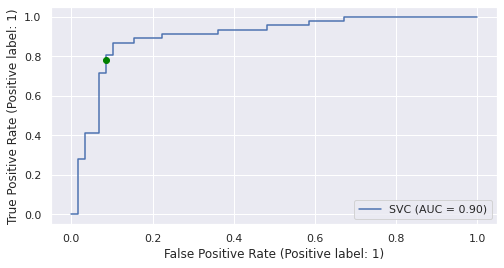

In [ ]:
gmean = np.sqrt(tpr * (1 - fpr))
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)

RocCurveDisplay.from_estimator(Mod_SVM_Final,XtestFTf,Ytest)
plt.plot(fprOpt,tprOpt,color='green', marker='o')

In [ ]:
print('Mejor umbral: {} con G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Mejor umbral: 1 con G-Mean: 0.8457
FPR: 0.0862, TPR: 0.7826


#**Ejercicio-10.**

Conclusiones finales.

* Gridsearch nos ayudó a encontar los mejores hiperparametros para este modelo en particular, aunque no nos da la posibilidad para saber si el modelo puede terminar sobreentrenado o subentrenado. Adicionalmente, se debe realizar un análisis de las curvas de aprendizaje para determinar si los modelos presentan valores de **sesgo y varianza baja**.

* La regularización fue una técnica que nos permitió corregir el sobrentrenamiento del modelo.

* Antes de elegir un scoring se debe tener en cuenta si estamos trabajando con una clase blanceada o desbalanceada, en el caso de este modelo al ser una clase balanceada fue confiable utilzar la métrica de acurracy.

* De acuerdo con nuestras curvas ROC y un AUC de 0.901, nuestro modelo clasifica de manera correcta. Es decir, que tiene la capacidad de predecir que si se autoriza o no una tarjeta de crédito a una persona que lo solicita.

###**Fin de la Actividad de la semana 8.**